TIMES
[Decimal('0.00002508699998315933044068515300750732421875'), Decimal('0.0000264880000031553208827972412109375')]
TIMES
[Decimal('0.00001647499999535284587182104587554931640625'), Decimal('0.00001527099999520942219533026218414306640625'), Decimal('0.000027216000006546892109327018260955810546875')]
TIMES
[Decimal('0.0000121790000093824346549808979034423828125'), Decimal('0.000008280999992393844877369701862335205078125'), Decimal('0.00000855100000762831768952310085296630859375'), Decimal('0.000008743999984517358825542032718658447265625')]
TIMES
[Decimal('0.000007560000000239597284235060214996337890625'), Decimal('0.00000744400000485256896354258060455322265625'), Decimal('0.00000694999999950596247799694538116455078125'), Decimal('0.0000492030000032173120416700839996337890625'), Decimal('0.000008965000006355694495141506195068359375')]
TIMES
[Decimal('0.000006350000006705158739350736141204833984375'), Decimal('0.00000517500001251391950063407421112060546875'), Decimal('0.0000054359999808

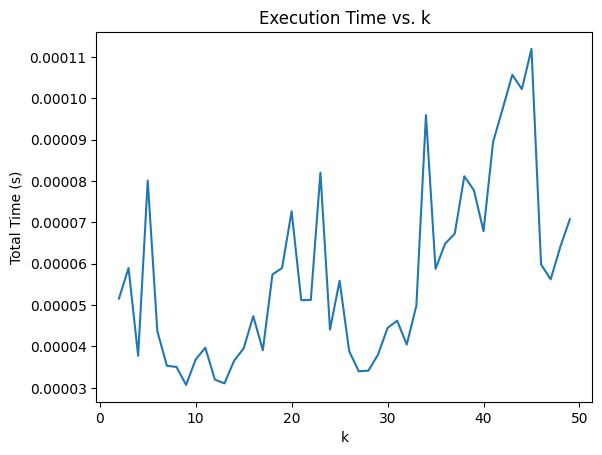

In [1]:
import time
import matplotlib.pyplot as plt
import random
import numpy as np
from decimal import Decimal, getcontext
import timeit

getcontext().prec = 50

def insertion_sort(arr):
    n = len(arr)
    for i in range(1, n):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def merge_sorted_arrays(arr1, arr2):
    merged = []
    i = len(arr1) - 1
    j = len(arr2) - 1

    while i >= 0 and j >= 0:
        if arr1[i] > arr2[j]:
            merged.append(arr1[i])
            i -= 1
        else:
            merged.append(arr2[j])
            j -= 1

    while i >= 0:
        merged.append(arr1[i])
        i -= 1

    while j >= 0:
        merged.append(arr2[j])
        j -= 1
    merged.reverse()
    return merged

def split_sort_merge(data, k):
    n = len(data)
    subarray_size = n // k
    sorted_subarrays = []
    remaining_elements = n % k
    start = 0
    timedArray = [Decimal('0')] * k

    for i in range(k):
        timer = timeit.Timer(lambda: insertion_sort(data[start:start + subarray_size]))
        timedArray[i] = Decimal(timer.timeit(number=1))
        sorted_subarrays.append(data[start:start + subarray_size])
        start += subarray_size

    merged_array = sorted_subarrays[-1]
    for i in range(k - 2, -1, -1):
        merged_array = merge_sorted_arrays(sorted_subarrays[i], merged_array)

    return [merged_array, timedArray]

timeCounter = []
ks = []

for k in range(2, 50):
    data = [random.randint(1, 1000001) for i in range(50)]
    sorted_data = split_sort_merge(data.copy(), k)
    print("TIMES")
    print(sorted_data[1])
    sum_times = Decimal('0')
    for time_value in sorted_data[1]:
        sum_times += time_value
    timeCounter.append(float(sum_times))
    ks.append(k)

plt.plot(ks,timeCounter)
plt.ylabel("Total Time (s)")
plt.xlabel("k")
plt.title("Execution Time vs. k")
plt.show()
